In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
X = 2 * np.random.rand(100,1)
y = 4 + (3*X) + np.random.randn(100,1)

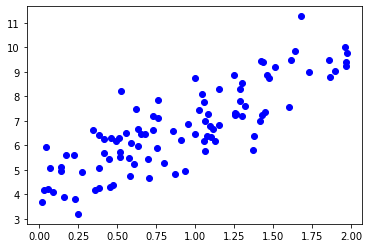

In [12]:
plt.plot(X,y,'o',color = 'blue')
plt.show()

In [13]:
# Concatenating ones to the left side of X. Why? - y = theta0 * 1 + theta1*x1 ....
X_b = np.c_[np.ones((100, 1)), X] 

In [15]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [16]:
theta_best

array([[4.29349037],
       [2.67737587]])

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

In [18]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [19]:
y_predict = X_new_b.dot(theta_best)

In [20]:
y_predict

array([[4.29349037],
       [9.64824211]])

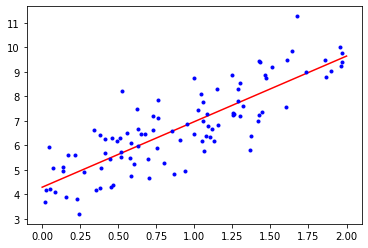

In [22]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [23]:
## Using scikit learn to perform linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.29349037]), array([[2.67737587]]))

In [24]:
lin_reg.predict(X_new)

array([[4.29349037],
       [9.64824211]])

In [25]:
## Calculating Pseudo Inverse.
np.linalg.pinv(X_b).dot(y)

array([[4.29349037],
       [2.67737587]])